This blog talks about the intuition behind activation functions which form an integral part in the design of Neural Net (NN for short) architectures.

By the end of this blog you will learn:
* What is a spiking neuron?
* How to simulate a Leaky Integrate and Fire neuron (- a spiking neuron model)?
* What is the intuition behind activation functions?

This is going to be a bit lengthy read; hence, please have some time available. I have tried to write it as lucid as possible. 

# Introduction
Ever wondered why do we have activation functions in the NNs? Well... the most common (and correct) answer is to introduce non-linearity in the network model, which helps in representing and computing non-linear functions. Absence of activation functions in NNs would effectively equate the network model to a matrix multiplication of weights and inputs. Thus, reducing the network to compute only Linear Transformations. In this article I will delve deeper into the theory behind activation functions. And as this blog's title goes, I will start with a spiking neuron model and then gradually build the intuition behind activation functions e.g. ReLU, Sigmoid, etc. in an artificial neuron. 

You might be wondering..., what is a Spiking Neuron? Unsurprisingly, Spiking Neurons are neuron models which generate or fire action potentials (aka spikes) upon receiving an input current (or so called _stimulus_ ); unlike artificial neurons in NNs which produce a continuous numerical output after feeding the summation of weighted inputs and bias into an activation function $\phi()$ (shown in the picture below).

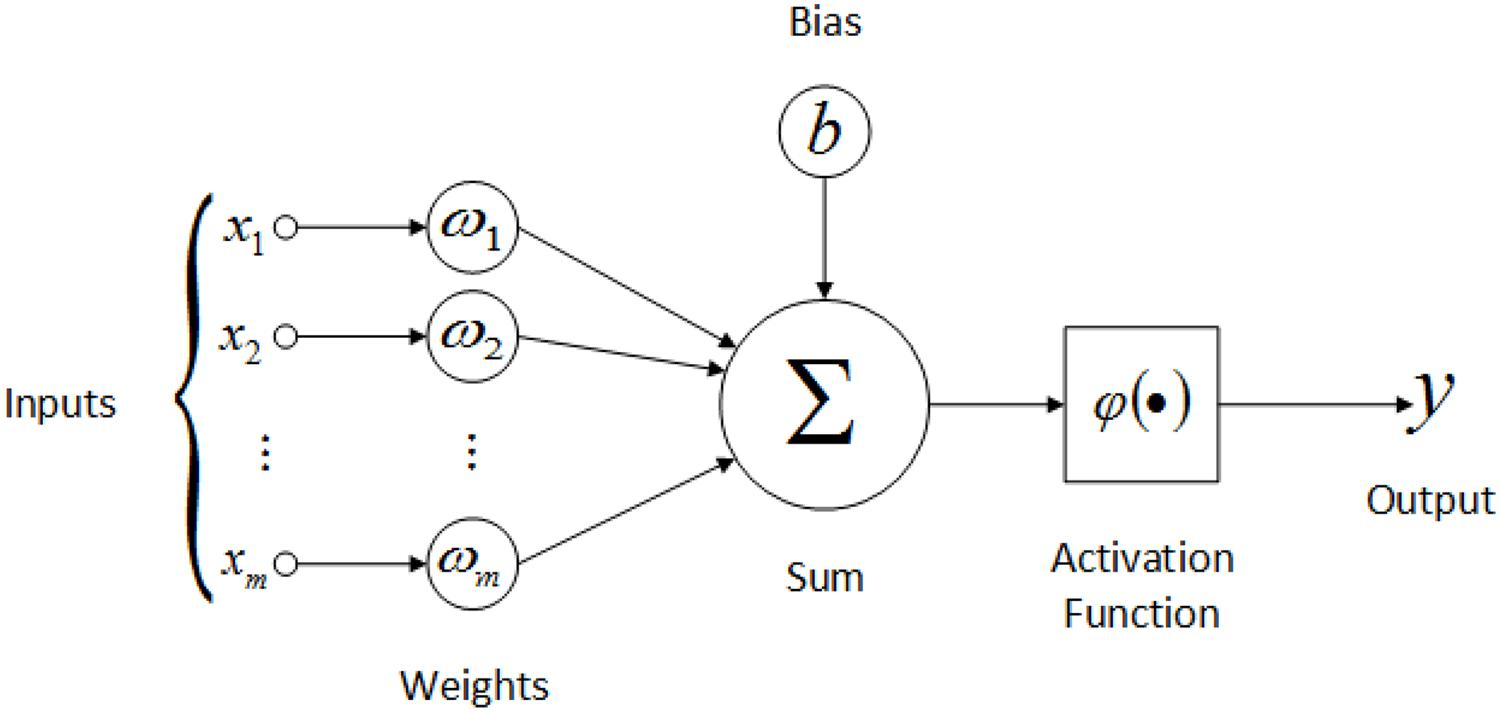

In the upcoming sections I will briefly introduce spiking neurons, followed by describing the mathematical model of Leaky Integrate and Fire (LIF) neurons. Next, I will simulate a LIF neuron and the develop the intuition behind activation functions.

# Spiking Neurons

Adding to the description above, spiking neurons are mathematical abstractions of biological neurons which mimic their physiological behaviour more realistically than artificial neurons. To learn about spiking neurons let us start by understanding the action potentials. They are waves of membrane's potential difference (between the intracellular and extracellular environment) propagating through the neuron's axon. Physiologically, a biological neuron fires action potentials upon receiving a stimulus. This stimulus can be a sensory input from the environment or even an incoming action potential. In absence of stimulus the neuron generally rests at a _resting potential_ which is around $-70$ millivolt ($mV$). However, each time a neuron receives a stimulus its membrane potential rises. But, does this rise in membrane potential necessarily mean that an action potential has been generated? No. To better understand this let us get a bird's eye view of the membrane potential dynamics in the picture below. Please note that the numerals mentioned in the picture do not reflect the actual measurements of neuron's biophysical values. Also, there are no sharp edges in the actual waveform. 

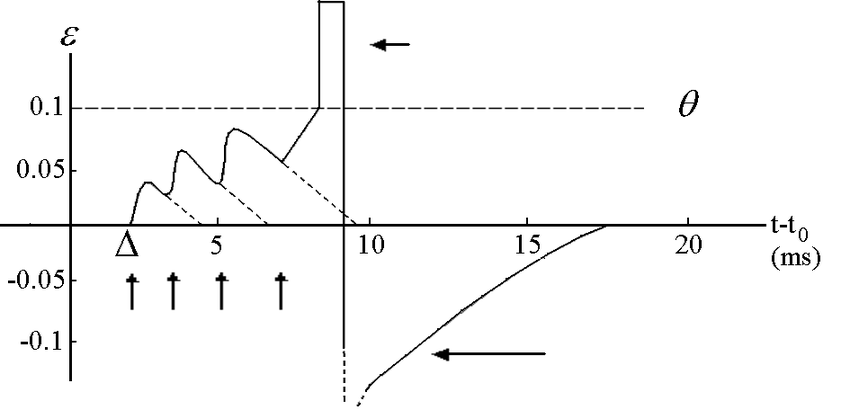

The `y-axis` denotes the membrane potential and the `x-axis` denotes the time in milliseconds. The first upward arrow denotes an incoming action potential (or spike), and this results in the rise of membrane potential. Each incoming spike increases the neuron's membrane potential; and it is only when its membrane potential reaches a certain threshold (say $V_{th}$, generally around $-55mV$), it fires an action potential. In the above picture the threshold ($V_{th}$) is denoted by value $0.1$. As you can see, immediately after firing an action potential (the smaller left pointing arrow at the top) the neuron's membrane potential falls below 0 and it enters into a so called `refractory` state (the bigger left pointing arrow at the bottom). During refractory period it cannot fire another spike; unless and until it receives a stimulus much stronger than a required normal. The refracotry period generally lasts for $2ms$ to $4ms$ of time. In the picture, the refractory period is shown to last for around $6ms$. Note that once the refractory period is over, the neuron is ready to spike again!  

If a Spiking Neuron produces $50$ spikes in a second, we say that it is firing (or spiking) at a frequency of $50Hz$. Thus, a Spiking Neuron has a minimum firing rate (generally at or above $0Hz$) and a maximum firing rate (generally below $150Hz$). There are many spiking neuron models (https://en.wikipedia.org/wiki/Biological_neuron_model), e.g. Integrate and Fire model, Leaky Integrate and Fire model, Exponential Integrate and Fire model etc. Here, I will simulate a Leaky Integrate and Fire (LIF) neuron model, but with some assumptions. I will assume that the neuron is unable to fire in refractory period no matter what the input stimulus is. Also, I will discard the units of assumed physiological values (e.g. membrane potential $V$) because this is a qualitative simulation, and it doesn't affect the overall understanding or behaviour of the spiking neurons. By the way, I am choosing this LIF neuron model because of its excellent trade-off between simplicity and ability to mimic the neuronal dynamics.

## Leaky Integrate and Fire (LIF) neuron

The LIF neuron is described by the following differential equation which governs its membrane potential changes. 

$$ \frac{dV(t)}{dt} = \frac{V_{rest} - V(t) + RJ(t)}{\tau_{RC}}$$ 

(https://neuronaldynamics.epfl.ch/online/Ch1.S3.html)
where $V(t)$ is the neuron's membrane potential over time, $V_{rest}$ is the resting potential, $R$ is the neuron's membrane equivalent resistance, $\tau_{RC}$ is the neuron's time constant, and $J(t)$ is the input current over time due to stimulus. The above neuron model is called leaky integrator because it gradually integrates over the membrane potential $V(t)$; but also leaks it with time via the _leaky_ resistor $R$. In addition, the above equation resembles to that of a Leaky Integrator (https://en.wikipedia.org/wiki/Leaky_integrator).

After assuming the values for $V_{rest}$ and $R$ to be 0 and 1 respectively, and addition of the equation which describes the behaviour of membrane potential when it reaches the threshold, the LIF neuron (to be simulated next) is described as follows.  
 
 $$\frac{dV(t)}{dt} = \frac{J(t) - V(t)}{\tau_{RC}}  \quad \quad  \text{ when } V(t) < V_{th} $$
 
 $$V(t) \leftarrow 0 \quad \quad  \quad \quad \text{ when } V(t) > V_{th} \text{ for } t_{th} < t < t_{th} + \tau_{ref} $$ 
 
where $t_{th}$ is the time point when the neuron's membrane potential reaches $V_{th}$, and $\tau_{ref}$ is the above-mentioned refractory period in $ms$.

## Simulation details of LIF neuron

Above equations are exactly what I will simulate here. I will be using the Euler method to solve the differential equation $\frac{dV(t)}{dt}$. As mentioned above, I am assuming values for certain parameters in the equations; all of which are mentioned in the table below. Note that I have also discarded the units.

| Parameter |           Description           | Assumed Value |
|:---------:|:-------------------------------:|:-------------:|
|     $R$     |       Membrane Resistance       |       1       |
|    $V_{th}$   |       Threshold Potential       |       1       |
|   $E_{rest}$  |        Resting Potential        |       0       |
|   $\tau_{RC}$  |      Membrane Time Constant     |      0.02     |
|  $\tau_{ref}$  | Neuron's Refractory Period |     0.002     |

By the way, one more computational detail needs to be mentioned here. The biophysical change in a neuron's dynamics takes over continuous time. However, since we are computationally simulating the neuron, we have to deal with discrete time intervals. Therefore, I will be setting the timestep $dt$ to 0.001s. 

# Code for simulating LIF neuron
Let us first begin by implementing the Euler's method to get the neuron's membrane potential at every time point. Note that for all the spiking neuron's simulations below, the `stimulus` input current $J$ is fed continuously throughout the simulation duration.

In [1]:
def get_new_membrane_potential(J, v_prev, tau_RC, dt):
  """
  Implements Euler method to solve the differential equation to obtain membrane
  potential.
  
  Args:
    J (float): The input current.
    v_prev (float): The previous membrane potential.
    tau_RC (float): The membrane's time constant.
    dt (float): The discrete timestep of the simulation.

  Returns:
    float: The new membrane potential.
  """
  slope = float((J - v_prev))/tau_RC
  return v_prev + dt * slope

Next, let us implement the LIF neuron model. Note that during the refractory period, the neuron's membrane potential is set to the resting potential `v_rest` i.e. 0 to indicate no increase in potential; thus, no spiking during refractory period. Also, if the neuron's membrane potential ever goes below 0, it is reset to resting potential. 

In [2]:
def simulate_spiking_neuron(J, tau_RC=20e-3, tau_ref=2e-3, T=1, dt=1e-3):
  """
  Simulates a spiking neuron.

  Args:
    J (float): The input current.
    tau_RC (float): The membrane's time constant.
    tar_ref (float): The neuron's refractory period (no spike in this duration).
    T (float): The total time of the simulation.
    dt (float): The discrete timestep of the simulation.
    
  Returns:
    int, [float], [float]: Number of spikes, Time points at which there was a
                           spike, Membrane potential at all time points.
  """
  # Assumptions.
  v_rest, v_th = 0, 1
  
  spike_times = [] # Stores the time points when the neuron spikes.
  v = [] # Stores the neuron's membrane potential at each time point.
  time_point, num_spikes = 0, 0
  # At the start of simulation, i.e. before the execution of first time point
  # it is assumed that the membrane's previous potential is at `v_rest`.
  v_prev = v_rest
  
  while(time_point < T):
    v_curr = get_new_membrane_potential(J, v_prev, tau_RC, dt)

    # If `v_curr` >= `v_th` at the current time point, the neuron spikes.
    if v_curr >= v_th:
      num_spikes += 1
      spike_times.append(time_point)
      v.append(v_curr)
      
      # Set the neuron's state in refractory period, starting at the time when
      # the spike ocurred.
      while(time_point < spike_times[-1] + tau_ref):
        # Rounding to 3 floating places is necessary to avoid precision issues.
        time_point = round(time_point + dt, 3)  
        if time_point >= T:
          break
        v_curr = v_rest # Reset the current membrane potential to `v_rest`.
        v.append(v_curr)
     
    # If `v_curr` goes below `v_rest` at the current time, reset it to `v_rest`.
    elif v_curr < v_rest: 
      v_curr = v_rest
      v.append(v_curr)
    else:
      v.append(v_curr)
    
    v_prev = v_curr # Update the previous membrane potential.
    time_point = round(time_point + dt, 3) # Update the current time.
    if time_point >= T:
      break
    
  return num_spikes, spike_times, v

Now, let us implement a helper function to translate spiking times to spikes, as well as a function to plot them. To mathematically model the spikes, we set it as a Dirac $\delta$ function at the time of spiking.

$$S_i(t_k) \leftarrow \delta(t_k) $$

where $t_k$ is the time at which $i^{th}$ neuron spikes. $S_i()$ is simply the spike translation function (from spiking time to spike) of $i^{th}$ neuron. If you remember, the Dirac $\delta$ function is zero everywhere except at 0 and its integral over the entire domain is one. Here we model the Dirac $\delta$ function as simply $\frac{1}{dt}$ where $dt$ is the small timestep (here set to 0.001s).

In [3]:
def get_spike_lines(times, spike_times, dt=1e-3):
  """
  Helper function to create spikes.
  
  Args:
    times ([float]): The simulation time points.
    spike_time ([float]): The simulation time points at which a spike was fired.
    dt (float): The discrete timestep of the simulation.
    
  Returns:
    [int]: The spike equivalents (delta function).
  """
  spikes = []
  i = 0
  for time in times:
    if i < len(spike_times) and np.allclose(time, spike_times[i]):
      spikes.append(int(np.round(1/dt))) # Delta function approximation.
      i += 1
    else:
      spikes.append(int(np.round(0/dt))) # Delta function approximation.
  
  return spikes


def plot_spikes(J, spike_times, T, dt):
    times = np.arange(0, T, dt)
    spikes = get_spike_lines(times, spike_times, dt)
    assert int(np.round(np.sum(spikes)*dt)) == len(spike_times)
    fig, ax = plt.subplots(figsize=(10, 4), facecolor="#00FFFF")
    fig.suptitle("Spike Train for constant input current J = %s, # Spikes: %s" 
                 % (J, len(spike_times)))
    ax.plot(times, spikes)
    ax.set_xlabel("Time $t$ in seconds")
    ax.set_ylabel("Spike")

What about plotting neuron's membrane potential? Let us plot them too for a better understanding. 

In [4]:
def plot_potential(v, J, T, dt):
  times = np.arange(0, T, dt)
  fig, ax = plt.subplots(figsize=(10, 4), facecolor="#00FFFF")
  ax.plot(times, v)
  fig.suptitle("Membrane potential over the simuation duration T = %s, J: %s" 
               % (T, J))
  ax.set_xlabel("Time $t$ in seconds")
  ax.set_ylabel("Membrane potential")

# Experiments
We have implemented all the necessary pieces of code. Let us next import the necessary libraries for simulation and call above-defined functions.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_exp(J, T=1, dt=1e-3):
  """
  Simulates experiment.
  
  Args:
    J (float): Input current.
    T (float): Simulation time period in seconds.
    dt (float): Simulation timestep in seconds.
  """
  num_spikes, spike_times, v = simulate_spiking_neuron(J, T=T, dt=dt) 
  plot_spikes(J, spike_times, T, dt)
  plot_potential(v, J, T, dt)

Let us feed an input current of 0 and observe the behaviour.

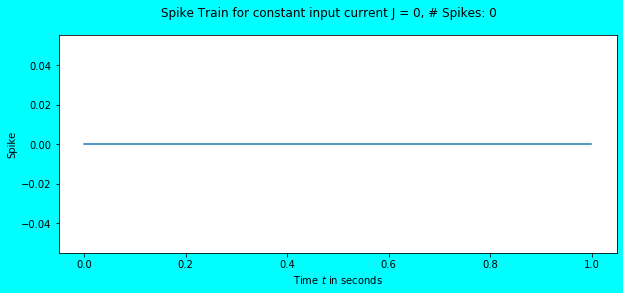

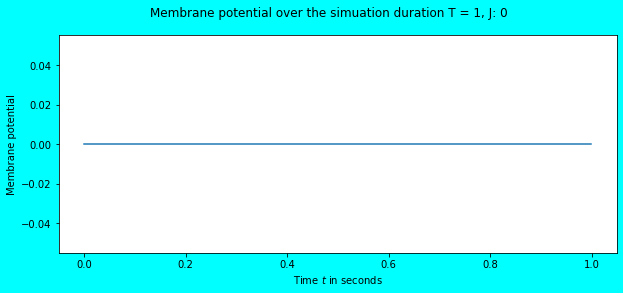

In [6]:
simulate_exp(J=0)

As expected, there are no spikes and no change in the neuron's membrane potential (it continues to stay at $V_{rest} = 0$. What about feeding an input current of 1?

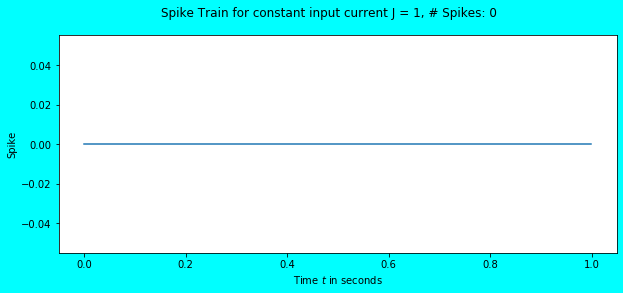

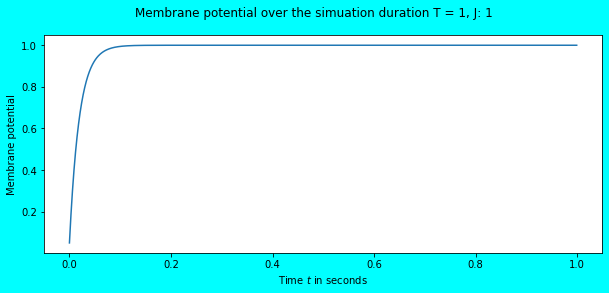

In [7]:
simulate_exp(J=1)

Again, no spikes but there was a change in the membrane potential. Visually, it seems that it has reached the threshold $V_{th} = 1$, but numerically it hasn't. Let us feed an input current of 1.1 and observe.

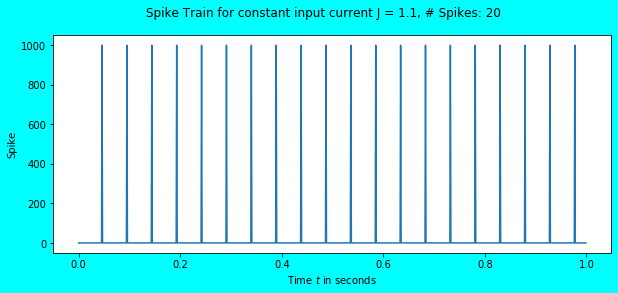

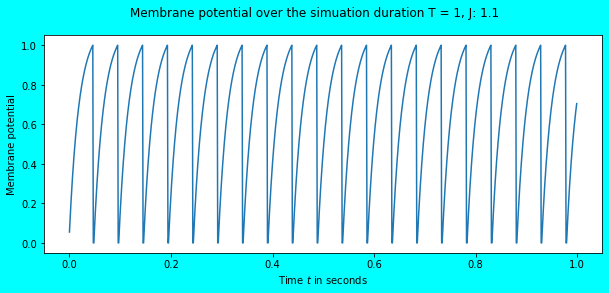

In [8]:
simulate_exp(J=1.1)

Awesome! We observe the neuron to fire some spikes, total 20 in number for the input current J = 1.1. Since the simulation duration is $1s$, the total number of spikes obtained is equal to the firing rate i.e. $20Hz$. In the above plot we also see that the membrane potential reaches the threshold $V_{th} = 1$ after which it immeditately falls to $V_{rest} = 0$ where it remains in the refractory period for $\tau_{ref} = 0.002$ seconds. Refractory period phenomena would be more visible in the plot below.

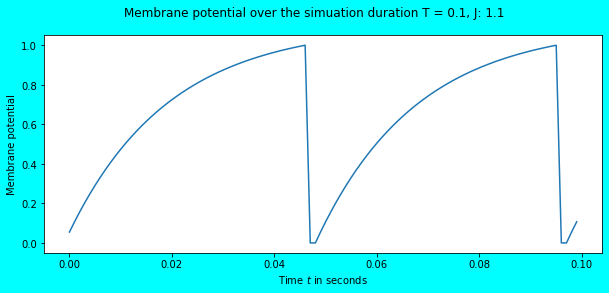

In [9]:
T, dt = 0.1, 0.001
J = 1.1
_, _, v = simulate_spiking_neuron(J, T=T)
plot_potential(v, J, T, dt)

As you can see between 0.04s and 0.06s, there is a small time period (here 0.002s) where the neuron's membrane potential remains at $V_{rest} = 0$, and there is no increase in the membrane potential despite the continuous input stimulus of $J=1.1$. 

You might have guessed that as we would increase the input current, the firing rate would also increase. And yes, it's true, but partly. After a certain value of input current, the firing rate saturates. In this simulation, it will saturate at 329Hz at an input of $J=20$ or higher when simulated for $T = 1s$. I will leave you with why. You will figure it out!

# Intuition behind Activation Functions
All the above work can now be culminated to get the intuition behind the activation function, the very purpose of this blog. As you know, the activation function outputs a value after accepting an input. This input and output is actually an abstract representation of _stimulus_ and _firing rate_ respectively. Further simulations will show how. I will feed an input current to the function `simulate_spiking_neuron()` for a period of $1s$ and record the output firing rate. This will be done for each integral input current in range \[0, 10\]. Let us write the necessary code for it. 

In [10]:
firing_rates = []
input_crnts = list(range(0, 11))

for crnt in input_crnts:
  num_spikes, _, _ = simulate_spiking_neuron(crnt)
  firing_rates.append(num_spikes)

Now that we have obtained the firing rates for different input currents, let us plot the firing rate vs the input current graph. Also, let us plot the common activation functions - namely `Sigmoid` and `ReLU` with the same inputs i.e. the input currents. 

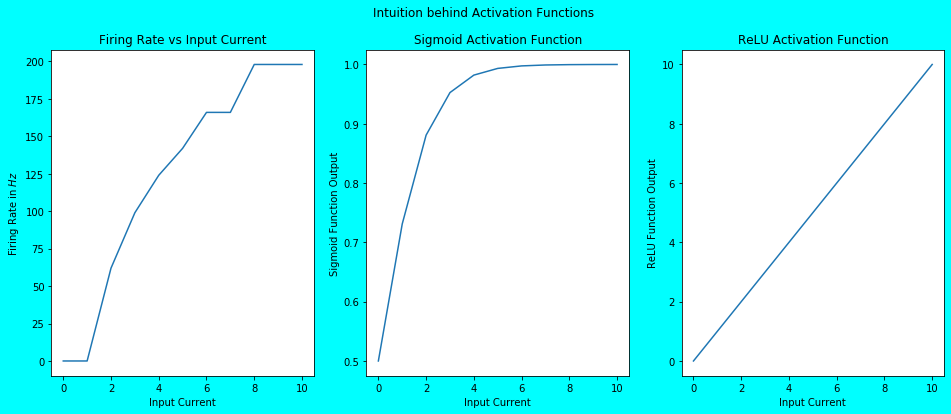

In [11]:
def sigmoid(x):
   return 1/(1+np.exp(-x))

def relu(x):
  return max(x, 0)

def plot_firing_rates_and_act_fns(firing_rates, input_crnts):
  fig, axs = plt.subplots(1, 3, figsize=(16, 6), facecolor="#00FFFF")
  fig.suptitle("Intuition behind Activation Functions")
  axs[0].plot(input_crnts, firing_rates)
  axs[0].set_xlabel("Input Current")
  axs[0].set_ylabel("Firing Rate in $Hz$")
  axs[0].set_title("Firing Rate vs Input Current")
  axs[0].plot()
  
  axs[1].plot(input_crnts, [sigmoid(crnt) for crnt in input_crnts])
  axs[1].set_xlabel("Input Current")
  axs[1].set_ylabel("Sigmoid Function Output")
  axs[1].set_title("Sigmoid Activation Function")
  axs[1].plot()
  
  axs[2].plot(input_crnts, [relu(crnt) for crnt in input_crnts])
  axs[2].set_xlabel("Input Current")
  axs[2].set_ylabel("ReLU Function Output")
  axs[2].set_title("ReLU Activation Function")
  axs[2].plot()
  
plot_firing_rates_and_act_fns(firing_rates, input_crnts)

As you can see above, the plot of `Sigmoid Activation Function` (although it's Half Sigmoid due to the non-negative inputs) and `ReLU Activation Function` closely matches the plot of `Firing Rate vs Input Current`. And this is exactly what the activation functions represent. Activation Function in NNs are simply qualitative abstraction of the firing patterns of biological spiking neurons. They qualitatively represent the firing magnitude of neuron upon receiving an input. For example, a step activation function just represents whether a neuron fires or not upon receiving an input. Whereas, a bit complex activation functions like Sigmoid and ReLU actually show the increase in firing rate with increase in input.

# Few Closing Words
For the curious mind, feel free to play with the parameters $\tau_{ref}$, $\tau_{RC}$ etc. to observe different firing patterns. You will observe that as you decrease the $\tau_{RC}$ the firing pattern of spiking neuron becomes more like sigmoid and as you increase the $\tau_{RC}$, the firing pattern becomes more like ReLU. Can you guess what the firing pattern will look like at a sufficient high value of $\tau_{RC}$ e.g. at $\tau_{RC} = 5$?